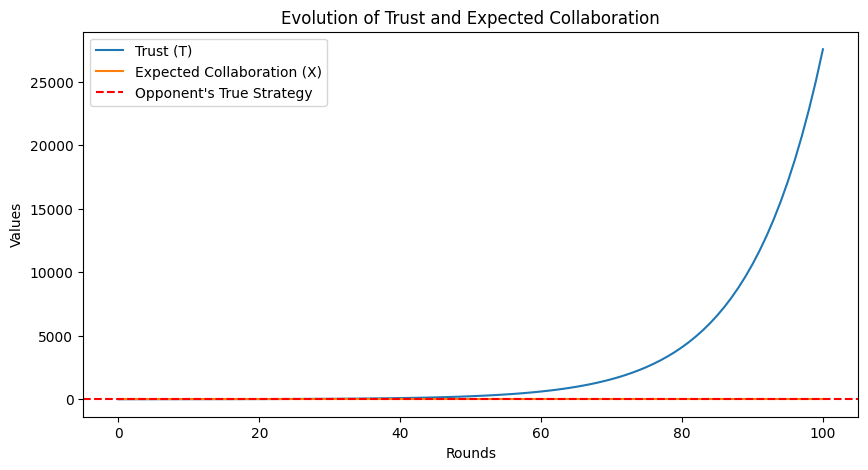

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Simulation Parameters
num_rounds = 100  
initial_x = 0.7    
0multiplicative_increase = 1.1  
multiplicative_decrease = 0.9  

# Opponent strategies: Always collaborate (1), Always defect (0), Mixed (50-50)
opponent_strategy = 1 

# Storage for tracking evolution
trust_values = [initial_t]
expected_collaborations = [initial_x]

# Function to update trust and expected collaboration
def update_trust_and_x(x, t, observed_action):
    # Update alpha and beta based on the observed action
    alpha = 1 + x * t
    beta = 1 + (1 - x) * t

   
    if observed_action == 1:  # Collaboration
        t *= multiplicative_increase
    else:  # Defection
        t *= multiplicative_decrease

    # Update X based on new trust value
    alpha = 1 + x * t
    beta = 1 + (1 - x) * t
    x = (alpha - 1) / (alpha + beta - 2)

    return x, t

# Run Simulation
x, t = initial_x, initial_t
for _ in range(num_rounds):
    observed_action = np.random.choice([1, 0], p=[opponent_strategy, 1 - opponent_strategy])
    x, t = update_trust_and_x(x, t, observed_action)

    trust_values.append(t)
    expected_collaborations.append(x)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(range(num_rounds + 1), trust_values, label="Trust (T)")
plt.plot(range(num_rounds + 1), expected_collaborations, label="Expected Collaboration (X)")
plt.axhline(y=opponent_strategy, color='r', linestyle='--', label="Opponent's True Strategy")
plt.xlabel("Rounds")
plt.ylabel("Values")
plt.title("Evolution of Trust and Expected Collaboration")
plt.legend()
plt.show()

# Display the data
import pandas as pd
df = pd.DataFrame({"Round": range(num_rounds + 1), "Trust (T)": trust_values, "Expected Collaboration (X)": expected_collaborations})

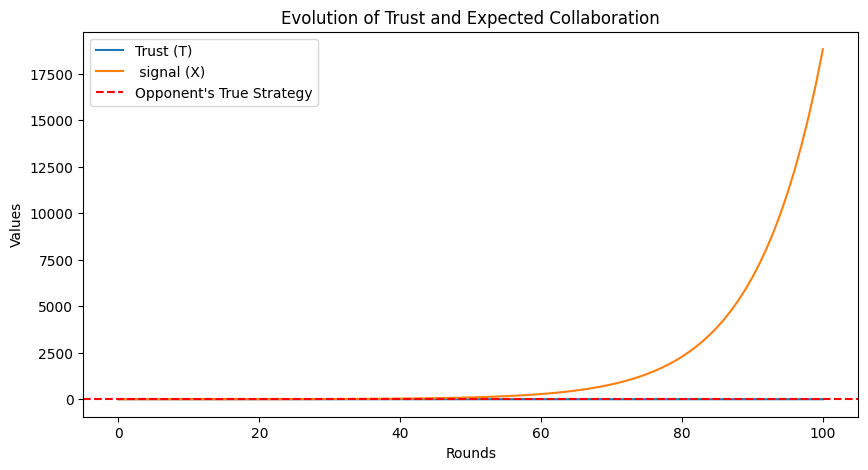

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
# Simulation Parameters
num_rounds = 100  
initial_beta = 2   
initial_alpha = 2     
multiplicative_alpha = 1.1  
multiplicative_beta = 0.9 

# Opponent strategies: Always collaborate (1), Always defect (0), Mixed (50-50)
opponent_strategy = 0  # Opponent's strategy (0, 1, or 0.5)

# Storage for tracking evolution
alpha_values = [initial_alpha]
beta_values = [initial_beta]
trust = [initial_alpha + initial_beta - 2]
signal = [(initial_alpha - 1) / (initial_alpha + initial_beta - 2)]
trust_values = [trust[0]]
stated_probability_of_ollaboration = [signal[0]]
# Function to update trust and expected collaboration
def update_trust_and_x(alpha, beta, trust, signal, observed_action):
    """ Updates the alpha and beta level. """
    
    # Update  and beta based on the observed action
    if observed_action == 1:  # Collaboration
        alpha *= multiplicative_alpha
    else:  # Defection
        beta *= multiplicative_beta

    # Now, update trust and signal with the new alpha and beta value
    trust = alpha + beta - 2 
    signal = (alpha - 1) / (alpha + beta - 2)

    return alpha, beta, trust, signal

# Run Simulation
alpha, beta = initial_alpha, initial_beta
for _ in range(num_rounds):
    observed_action = np.random.choice([1, 0], p=[opponent_strategy, 1 - opponent_strategy])
    alpha, beta, trust, signal = update_trust_and_x(alpha, beta, trust, signal, observed_action)

    trust_values.append(trust)
    stated_probability_of_ollaboration.append(signal)

# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(range(num_rounds + 1), trust_values, label="Trust (T)")
plt.plot(range(num_rounds + 1), stated_probability_of_ollaboration, label=" signal (X)")
plt.axhline(y=opponent_strategy, color='r', linestyle='--', label="Opponent's True Strategy")
plt.xlabel("Rounds")
plt.ylabel("Values")
plt.title("Evolution of Trust and Expected Collaboration")
plt.legend()
plt.show()


In [35]:
beta_values

[2]

C:\Users\mzarreh\AppData\Local\Temp\ipykernel_46480\553153985.py:42: RuntimeWarning: divide by zero encountered in scalar divide
  current_x[i] = max(0, min(1, (observed_accuracy * (current_kappa[i] - 2) + 1) / (current_kappa[i] - 2)))


<Figure size 800x600 with 0 Axes>

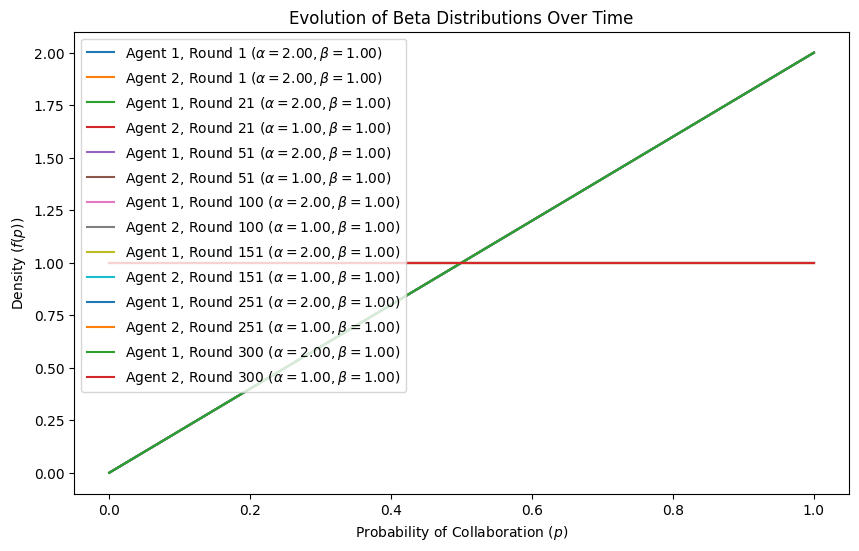

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
import math
# Simulation Parameters
num_agents = 2  
num_rounds = 300  
learning_rate = 0.5 

# Initialize Beta distribution parameters (initial beliefs about collaboration probability)
kappa_values = [np.full(num_agents, 3)]  
x_values = [np.full(num_agents, 1)]  

# History for visualization
history = {
    "actions": [[] for _ in range(num_agents)],
    "beliefs": [[] for _ in range(num_agents)]
}

# Function to determine action based on expected probability
def choose_action(expected_p):
    return np.random.rand() < expected_p  

# Run simulation
for _ in range(num_rounds):
    current_kappa = kappa_values[-1].copy() 
    current_x = x_values[-1].copy() 
    
    expected_p = current_x 
    
    actions = [choose_action(expected_p[i]) for i in range(num_agents)]  
    
    
    observed_accuracy = np.mean(history["actions"][i]) if history["actions"][i] else 0.5  # Default to 50% initially
        
    # Update trust (concentration parameter kappa) based on observed accuracy
    current_kappa[i] += (learning_rate) * (observed_accuracy - current_x[i])
    current_kappa[i] = max(2.01, current_kappa[i])  # Ensure kappa remains > 2 to avoid division by zero
        
    # Update mode based on new kappa with clamping
    current_x[i] = max(0, min(1, (observed_accuracy * (current_kappa[i] - 2) + 1) / (current_kappa[i] - 2)))
        
    # Store data for visualization
    history["actions"][i].append(actions[i])
    history["beliefs"][i].append(expected_p[i])
    
    # Store updated kappa and mode values
    kappa_values.append(current_kappa)
    x_values.append(current_x)

# Convert lists to numpy arrays for easier indexing
kappa_values = np.array(kappa_values)
x_values = np.array(x_values)

# Generate Trust vs. Signal plot
time_steps = [0, 20, 50, 99,150,250,299]  # Selected time points

plt.figure(figsize=(8, 6))

# Generate Beta distribution plots at selected rounds
p = np.linspace(0, 1, 100)
plt.figure(figsize=(10, 6))
for t in time_steps:
    for i in range(num_agents):
        alpha_t = 1 + x_values[t, i] * (kappa_values[t, i] - 2)
        beta_t = 1 + (1 - x_values[t, i]) * (kappa_values[t, i] - 2)
        plt.plot(p, beta.pdf(p, alpha_t, beta_t), 
                 label=f"Agent {i+1}, Round {t+1} ($\\alpha={alpha_t:.2f}, \\beta={beta_t:.2f}$)")

plt.xlabel("Probability of Collaboration ($p$)")
plt.ylabel("Density ($f(p)$)")
plt.title("Evolution of Beta Distributions Over Time")
plt.legend()
plt.show()
